# Лабораторная работа №5. Визуализация данных

In [5]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Numpy version: 2.0.2
Matplotlib version: 3.10.0


Задача **1**

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией


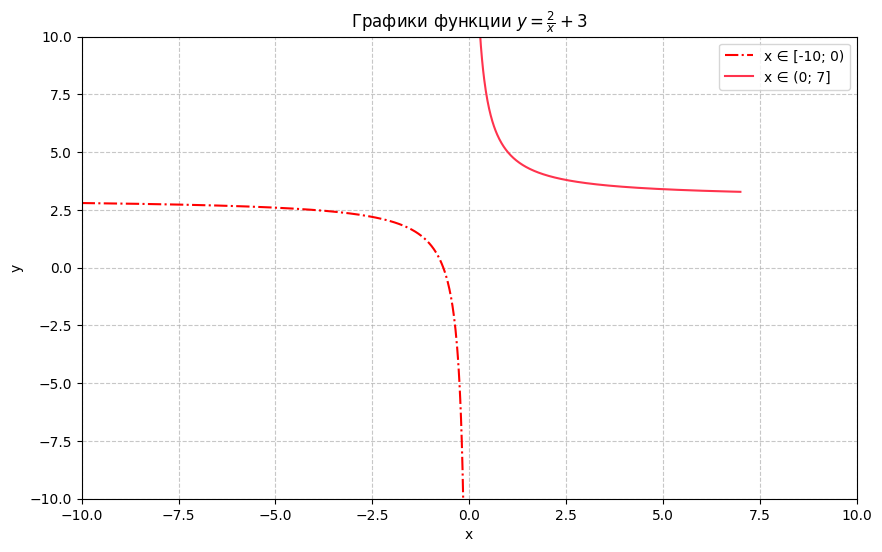

In [3]:
x1 = np.linspace(-10, -0.01, 500)
y1 = 2 / x1 + 3

x2 = np.linspace(0.01, 7, 500)
y2 = 2 / x2 + 3

plt.figure(figsize=(10, 6))

plt.plot(x1, y1, color='red', linestyle='-.', label='x ∈ [-10; 0)')
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), linestyle='-', label='x ∈ (0; 7]')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики функции $y = \\frac{2}{x} + 3$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Задача **2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возврат пассажира (Age)
* По оси Y - стоимость билета (Fare)
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

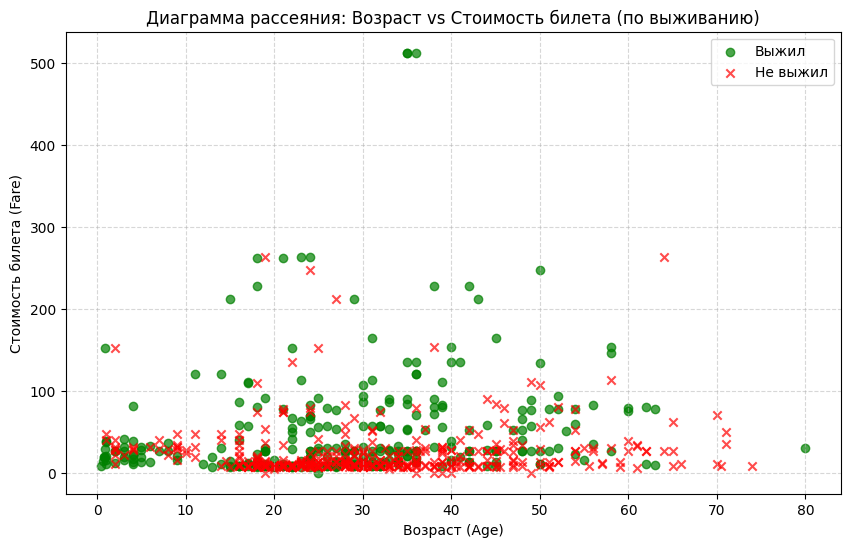

In [6]:
titanic_df = pd.read_csv("/content/data/titanic.csv", index_col='PassengerId')

titanic_df = titanic_df.dropna(subset=['Age', 'Fare'])

survived = titanic_df[titanic_df['Survived'] == 1]
not_survived = titanic_df[titanic_df['Survived'] == 0]

plt.figure(figsize=(10, 6))

plt.scatter(survived['Age'], survived['Fare'],
            color='green', marker='o', label='Выжил', alpha=0.7)

plt.scatter(not_survived['Age'], not_survived['Fare'],
            color='red', marker='x', label='Не выжил', alpha=0.7)

plt.xlabel('Возраст (Age)')
plt.ylabel('Стоимость билета (Fare)')
plt.title('Диаграмма рассеяния: Возраст vs Стоимость билета (по выживанию)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Задача **3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

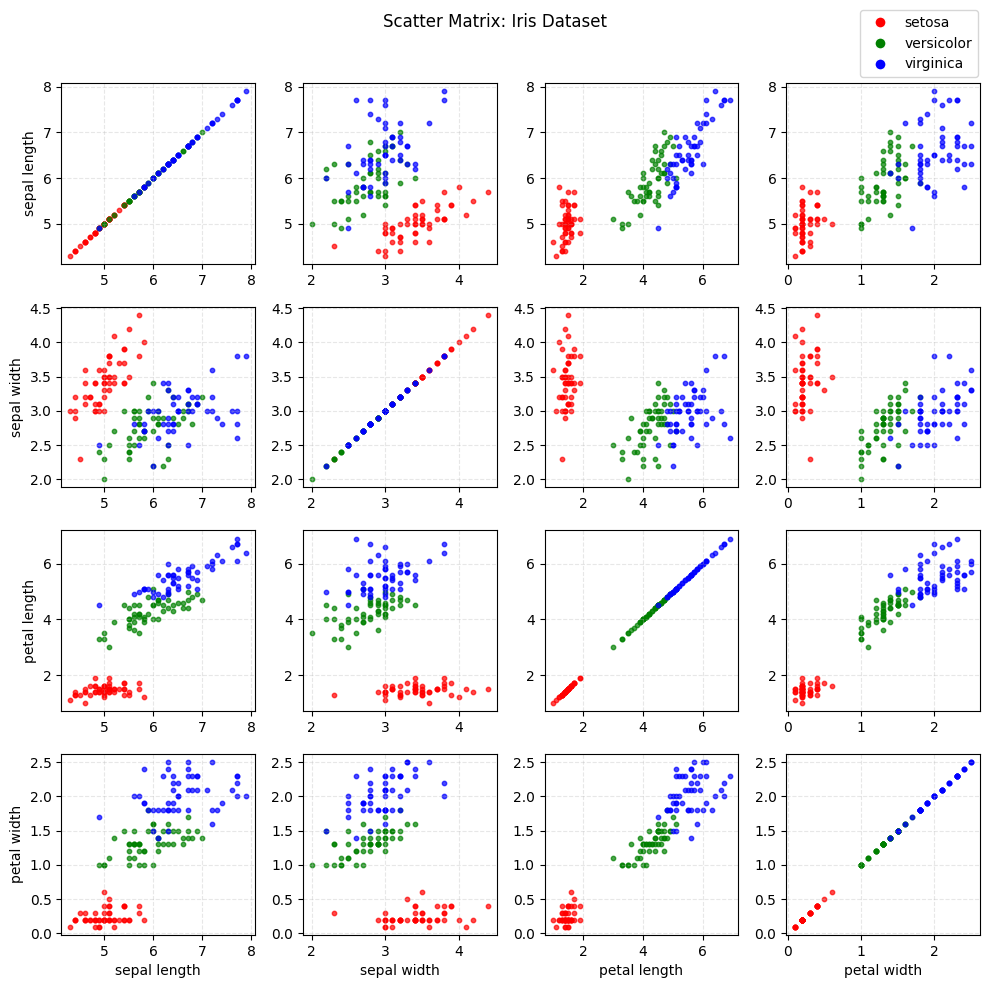

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
names = [n.replace(' (cm)', '') for n in iris.feature_names]
colors = ['red', 'green', 'blue']

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('Scatter Matrix: Iris Dataset')

for i in range(4):
    for j in range(4):
        for cls in range(3):
            axes[i, j].scatter(X[y==cls, j], X[y==cls, i],
                             c=colors[cls], s=10, alpha=0.7)
        if i == 3: axes[i, j].set_xlabel(names[j])
        if j == 0: axes[i, j].set_ylabel(names[i])
        axes[i, j].grid(True, linestyle='--', alpha=0.3)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=8)
           for c in colors]
fig.legend(handles, iris.target_names, loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Задача **4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

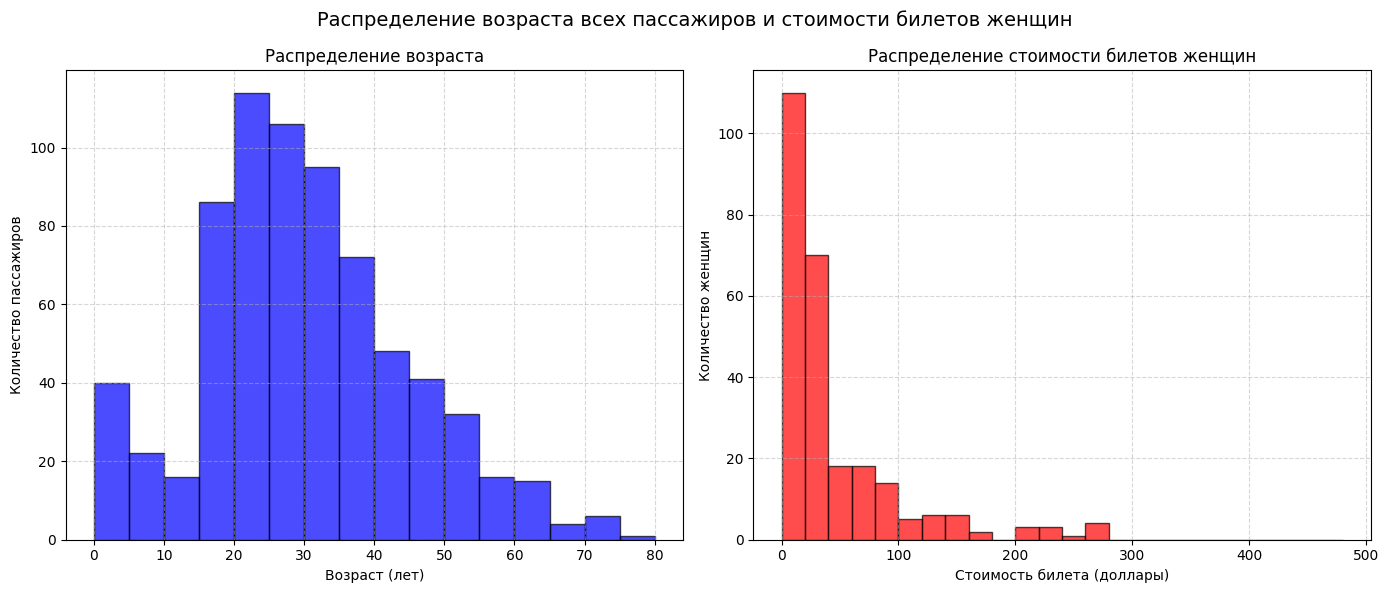

In [12]:
titanic_df = pd.read_csv("/content/data/titanic.csv", index_col='PassengerId')

titanic_df = titanic_df.dropna(subset=['Age', 'Fare'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

bins_age = range(0, 85, 5)
ax1.hist(titanic_df['Age'], bins=bins_age, color='blue', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Возраст (лет)')
ax1.set_ylabel('Количество пассажиров')
ax1.set_title('Распределение возраста')
ax1.grid(True, linestyle='--', alpha=0.5)

female_df = titanic_df[titanic_df['Sex'] == 'female']
bins_fare = np.arange(0, 500, 20)
ax2.hist(female_df['Fare'], bins=bins_fare, color='red', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Стоимость билета (доллары)')
ax2.set_ylabel('Количество женщин')
ax2.set_title('Распределение стоимости билетов женщин')
ax2.grid(True, linestyle='--', alpha=0.5)

fig.suptitle('Распределение возраста всех пассажиров и стоимости билетов женщин', fontsize=14)

plt.tight_layout()
plt.show()

Задача **5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

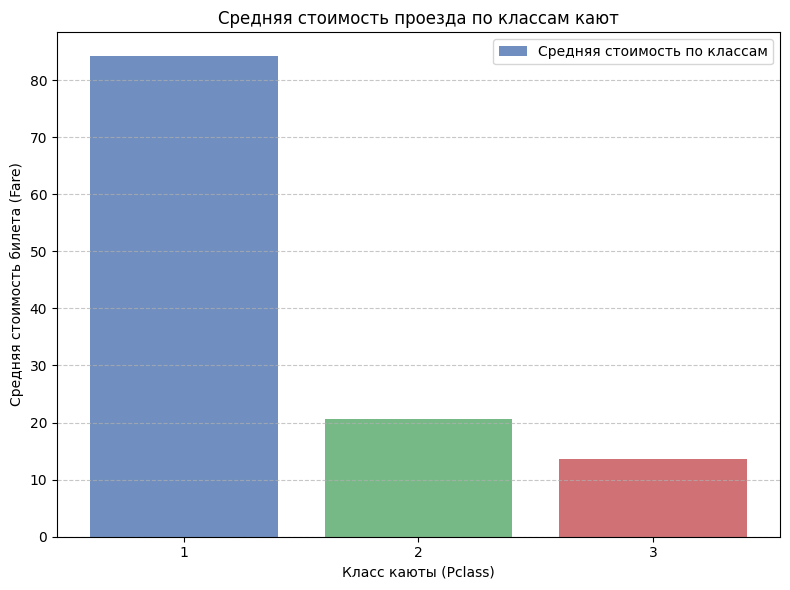

In [13]:
titanic_df = pd.read_csv("/content/data/titanic.csv", index_col='PassengerId')
avg_fare_by_class = titanic_df.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(8, 6))
bars = plt.bar(avg_fare_by_class.index, avg_fare_by_class.values,
               color=['#4c72b0', '#55a868', '#c44e52'], alpha=0.8)

plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Средняя стоимость билета (Fare)')
plt.title('Средняя стоимость проезда по классам кают')
plt.xticks(avg_fare_by_class.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(['Средняя стоимость по классам'], loc='upper right')

plt.tight_layout()
plt.show()

Задача **6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

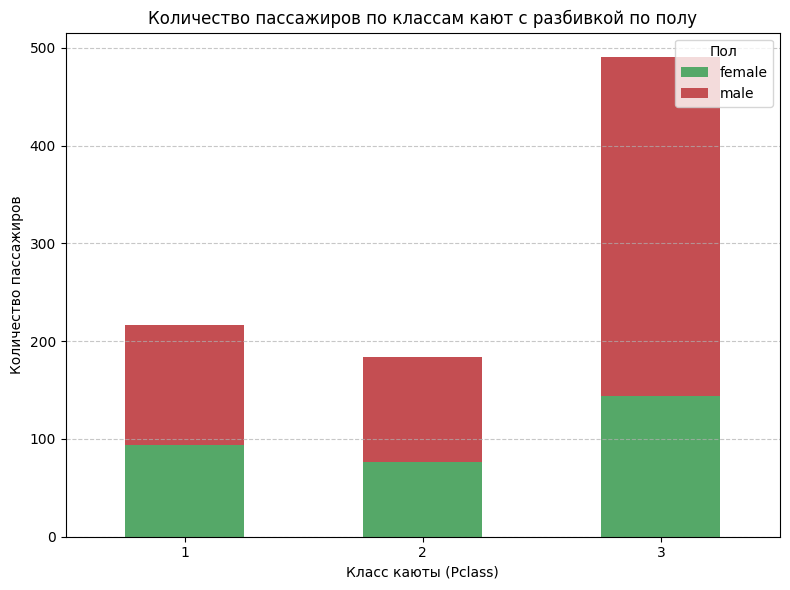

In [15]:
titanic_df = pd.read_csv("/content/data/titanic.csv", index_col='PassengerId')

pivot = titanic_df.groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)

ax = pivot.plot(kind='bar', stacked=True, color=['#55a868', '#c44e52'], figsize=(8, 6))

plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров по классам кают с разбивкой по полу')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Пол', loc='upper right')

plt.tight_layout()
plt.show()

Задача **7**

Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

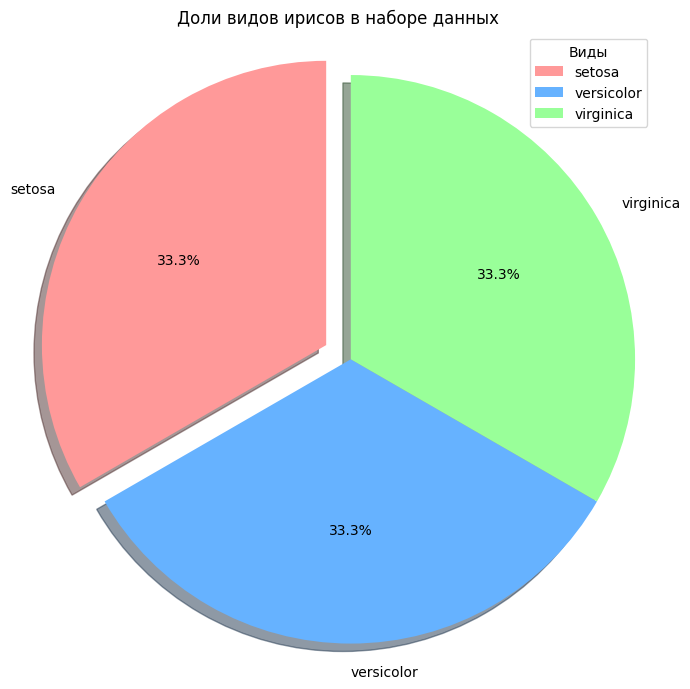

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

target_names = iris.target_names
counts = [(iris.target == i).sum() for i in range(3)]

explode = [0.1 if i == counts.index(max(counts)) else 0 for i in range(3)]

plt.figure(figsize=(7, 7))
plt.pie(counts, labels=target_names, autopct='%1.1f%%', startangle=90,
        colors=['#FF9999', '#66B2FF', '#99FF99'], explode=explode, shadow=True)

plt.title('Доли видов ирисов в наборе данных')
plt.legend(target_names, title="Виды", loc="best")
plt.axis('equal')

plt.tight_layout()
plt.show()

Задача **8**

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

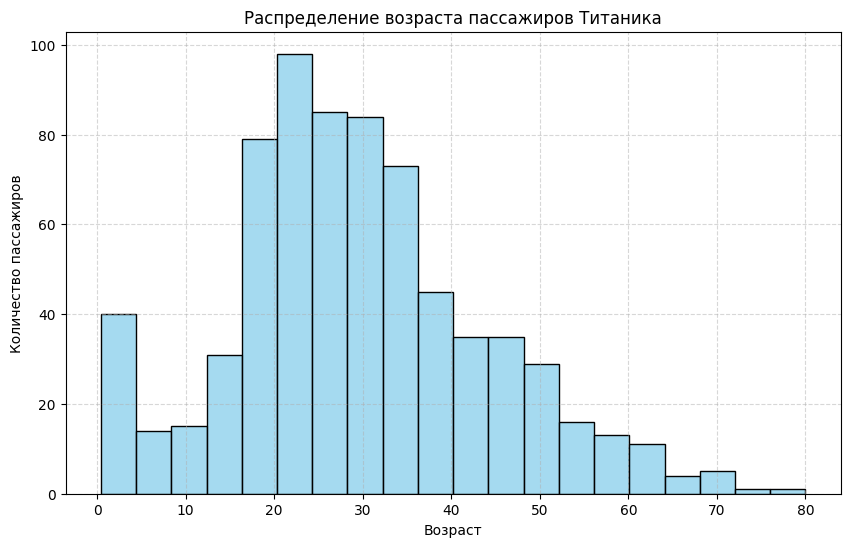

In [18]:
import seaborn as sns

titanic_df = pd.read_csv("/content/data/titanic.csv", index_col='PassengerId')

plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Age', bins=20, kde=False, color='skyblue', edgecolor='black')

plt.title('Распределение возраста пассажиров Титаника')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

## Вопросы


1. Для чего используется диаграмма рассеяния?
2. Что такое гистограмма, чем он отличается от столбчатой диаграммы?
3. Как задать цвет линии в линейном графике Matplotlib?
4. Чем класс plt.Figure отличается от объекта  plt.Axes?
5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?
6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?
7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?
8. В наборе данных iris представлены 4 вида ирисов. Да или нет?
9. Для всех пассажиров "Титаника" указан возраст. Да или нет?
10. Как на одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.